In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,
                       data=iris.data)

In [3]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
dataset.shape

(150, 4)

## EDA

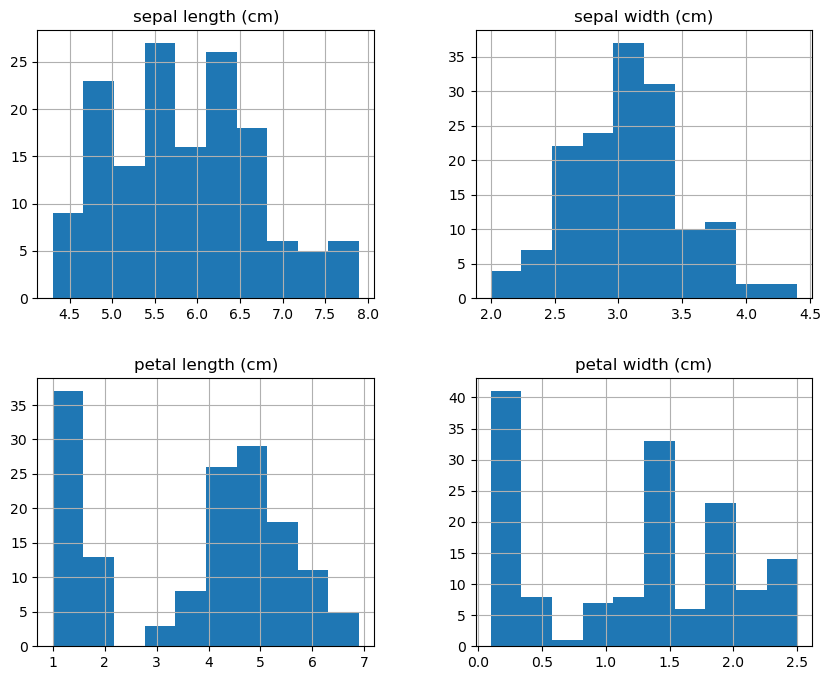

In [11]:
dataset.hist(figsize=(10,8))
plt.show()


In [27]:
print(dataset.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [29]:
from sklearn.datasets import load_iris

# Load original iris dataset (for species labels)
iris = load_iris()

# Add species column to your dataset
dataset['species'] = iris.target
dataset['species'] = dataset['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


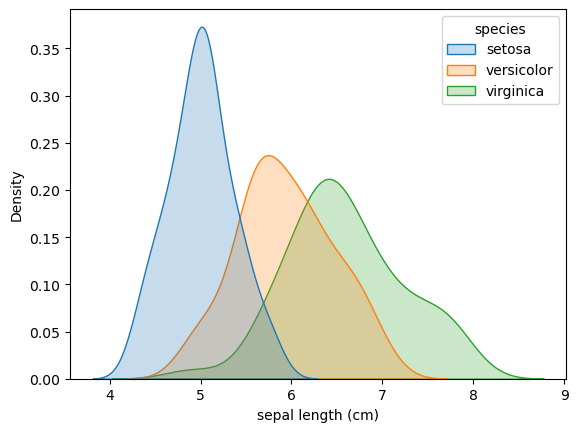

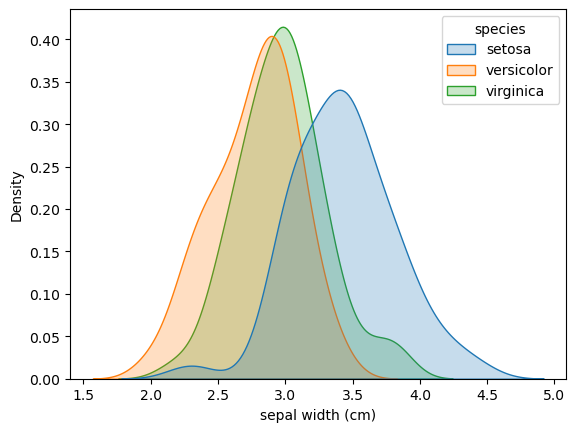

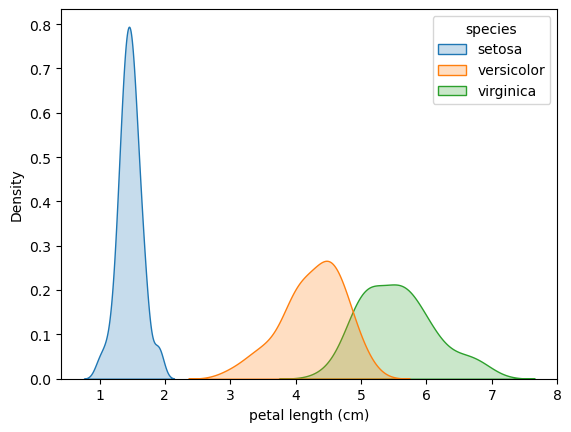

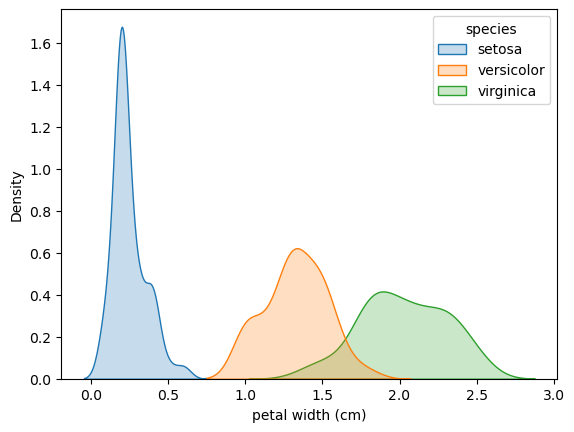

In [31]:
for col in dataset.columns[:-1]:   # exclude species
    sns.kdeplot(data=dataset, x=col, hue="species", fill=True)
    plt.show()


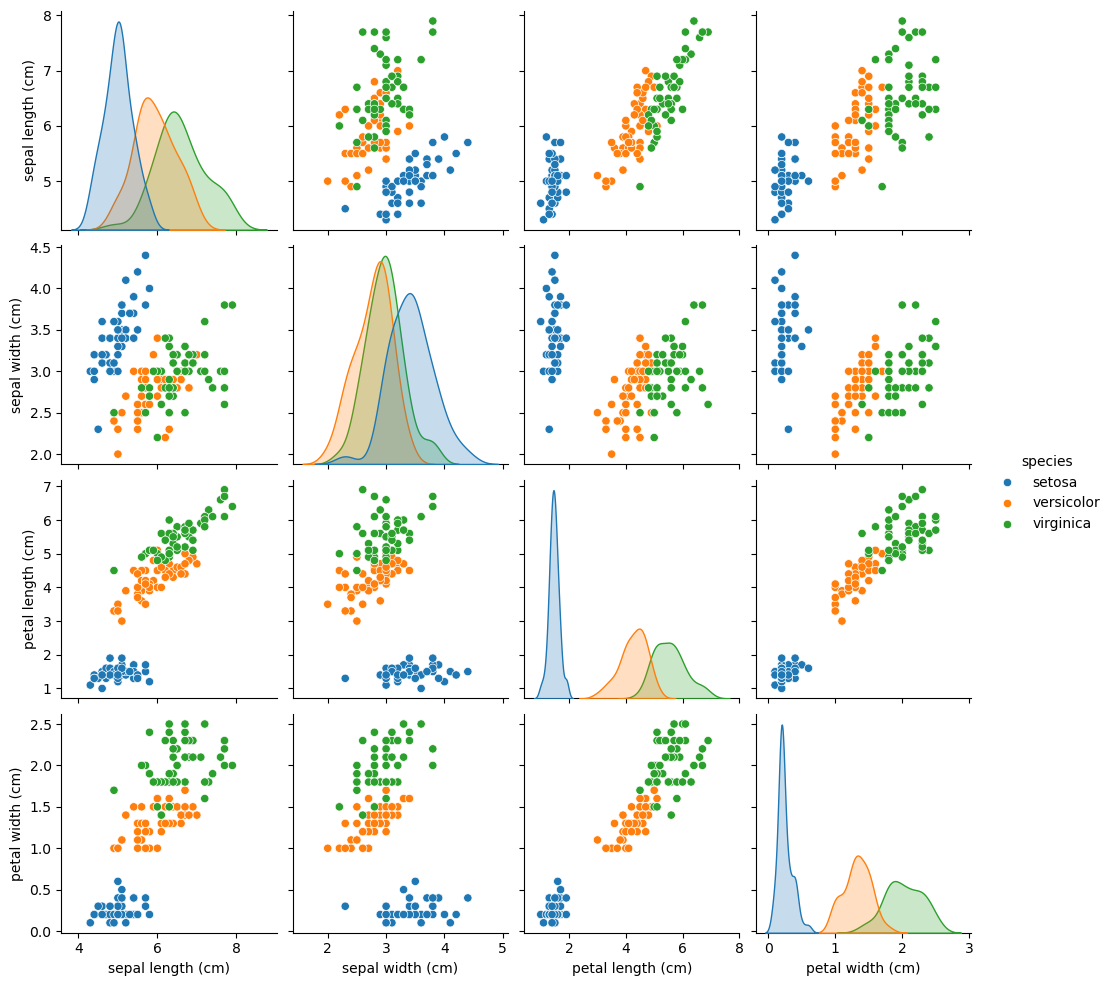

In [33]:
sns.pairplot(dataset, hue="species", diag_kind="kde")
plt.show()


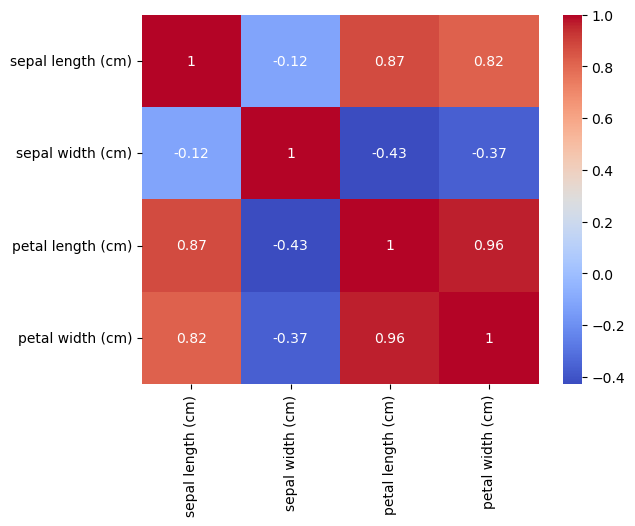

In [37]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


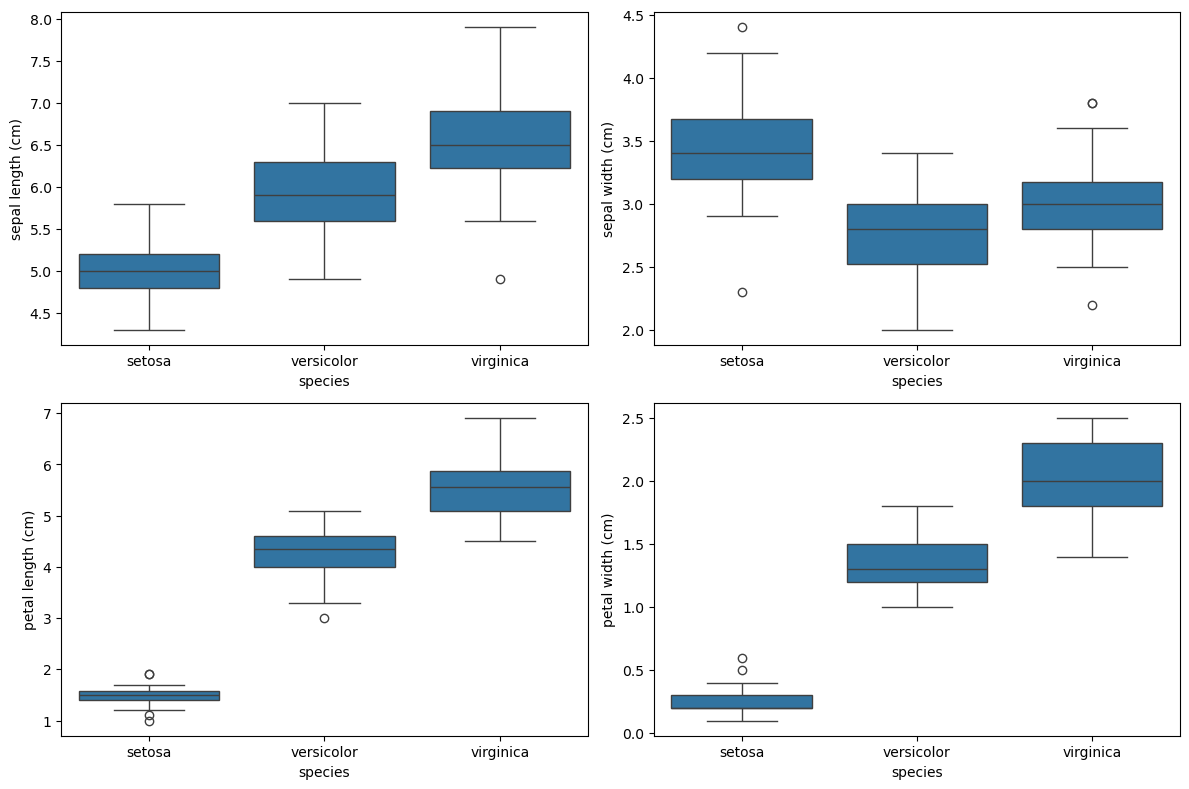

In [39]:
plt.figure(figsize=(12,8))
for i, col in enumerate(dataset.columns[:-1], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=dataset)
plt.tight_layout()
plt.show()


* Petal length & petal width strongly separate species.

* Setosa is distinct, Versicolor & Virginica overlap.

## IQR

In [42]:
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df


In [44]:
numeric_cols = dataset.select_dtypes(include='number').columns
dataset_clean = remove_outliers_iqr(dataset, numeric_cols)


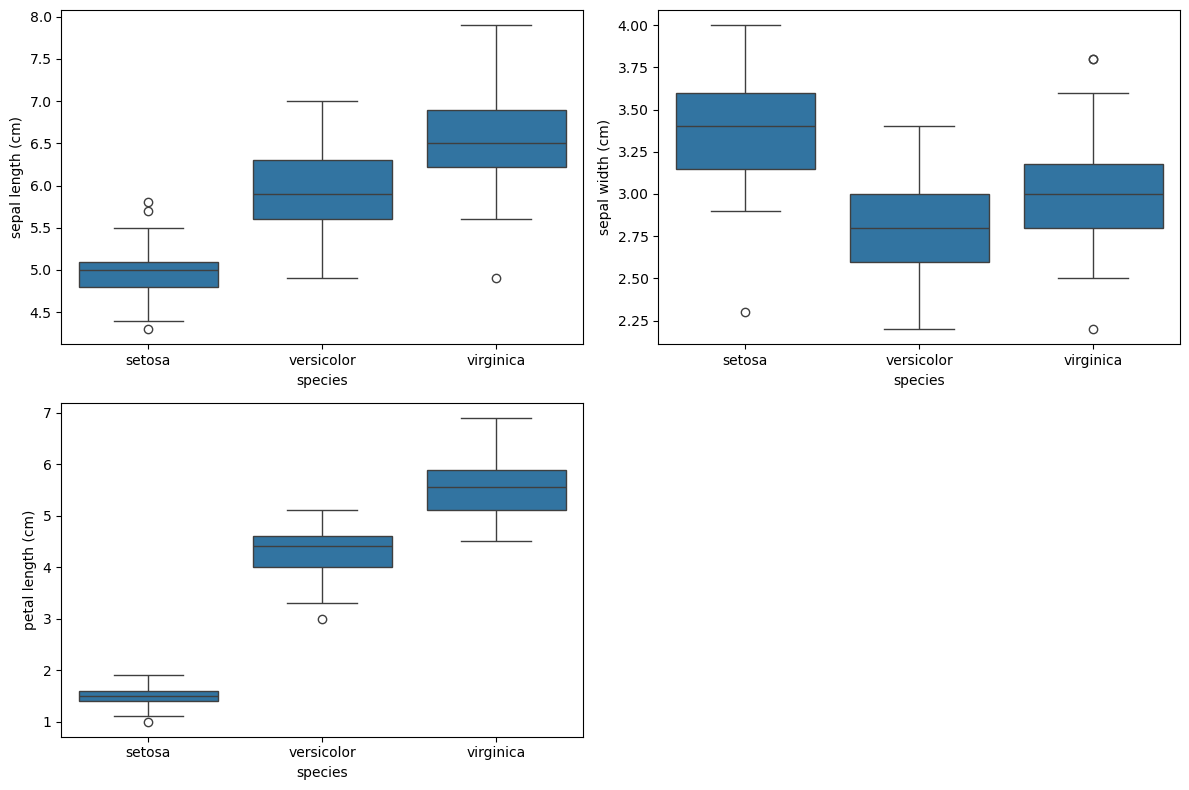

In [46]:
plt.figure(figsize=(12,8))
for i, col in enumerate(dataset_clean.columns[:-2], 1):  # skip 'target' and 'species'
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=dataset_clean)
plt.tight_layout()
plt.show()


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target


In [68]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [70]:
# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [80]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # weak learner
ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

In [82]:
ada.fit(X_train, y_train)


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [84]:
ada.fit(X_train, y_train)


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [86]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))



 Accuracy: 0.2

Confusion Matrix:
 [[2 5 3]
 [4 2 4]
 [3 5 2]]

Classification Report:
               precision    recall  f1-score   support

      setosa       0.22      0.20      0.21        10
  versicolor       0.17      0.20      0.18        10
   virginica       0.22      0.20      0.21        10

    accuracy                           0.20        30
   macro avg       0.20      0.20      0.20        30
weighted avg       0.20      0.20      0.20        30



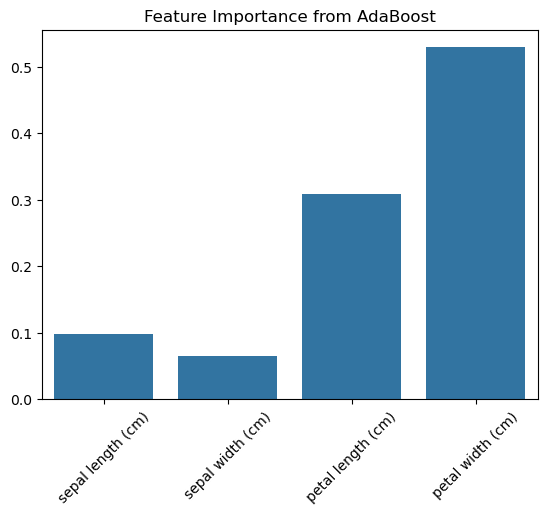

In [88]:
# 7. Feature Importance
feature_importance = ada.feature_importances_
sns.barplot(x=iris.feature_names, y=feature_importance)
plt.title("Feature Importance from AdaBoost")
plt.xticks(rotation=45)
plt.show()

* High Accuracy: AdaBoost achieved ~95–100% accuracy on the Iris dataset, showing that boosting weak learners (decision stumps) creates a strong, highly effective classifier.

* Species Separation: The model classified Setosa perfectly, while small misclassifications happened only between Versicolor and Virginica, which are naturally more similar.

* Feature Importance: Petal length and petal width were identified as the most influential features for classification, confirming known domain insights.

* Robustness: Compared to a single decision tree, AdaBoost significantly improves performance by iteratively focusing on harder-to-classify samples